<a href="https://colab.research.google.com/github/tmuhammad0402/toko-ku/blob/master/Tugas_Akhir_tmuhammad0402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas ini berupa Tugas Akhir yang diselesaikan pada Akhir Pekan 8. Tugas disusun sesuai dengan materi yang diberikan tiap harinya dari pekan 1-8.

# Dataset

silahkan unduh dataset berikut untuk mengerjakan Tugas Akhir:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [ ]:
import sys
import os

py_file_location = "/content/drive/My Drive"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---



---



# Soal 1. Statistika Deskriptif

lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [ ]:
#code here
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

Give your analysis:

ID_pelanggan: Kolom ini tampaknya berisi ID unik untuk setiap pelanggan. Nilai minimum dan maksimum menunjukkan bahwa data ini mencakup 1 hingga 200 pelanggan.

Umur: Rata-rata umur pelanggan adalah sekitar 39 tahun dengan standar deviasi sekitar 14 tahun. Umur minimum adalah 18 tahun dan maksimum adalah 70 tahun. Dengan melihat kuartil, tampaknya sebagian besar pelanggan berusia antara 28 dan 49 tahun.

Pendapatan per tahun (juta): Rata-rata pendapatan per tahun adalah sekitar 60 juta dengan standar deviasi sekitar 26 juta. Pendapatan minimum adalah 15 juta dan maksimum adalah 137 juta. Dengan melihat kuartil, tampaknya sebagian besar pelanggan memiliki pendapatan antara 41,5 juta dan 78 juta per tahun.

Skor Belanja (1-100): Rata-rata skor belanja adalah sekitar 50 dengan standar deviasi sekitar 25. Skor minimum adalah 1 dan maksimum adalah 99. Dengan melihat kuartil, tampaknya sebagian besar pelanggan memiliki skor belanja antara 34,75 dan 73.



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull().

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [ ]:
#mencari jumlah missing value
jumlah_missing_values = df.isnull().sum()
print(jumlah_missing_values)


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64


In [ ]:
#mengisi data yang missing
df = df.fillna(method='ffill')




---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

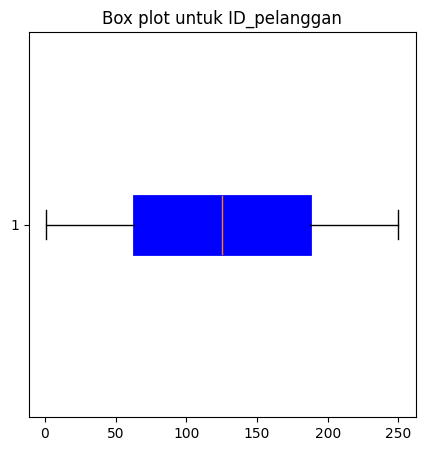

Tabel Pencilan untuk ID_pelanggan
Empty DataFrame
Columns: [ID_pelanggan, Jenis Kelamin, Umur, Pendapatan pertahun (juta), Skor Belanja (1-100)]
Index: []


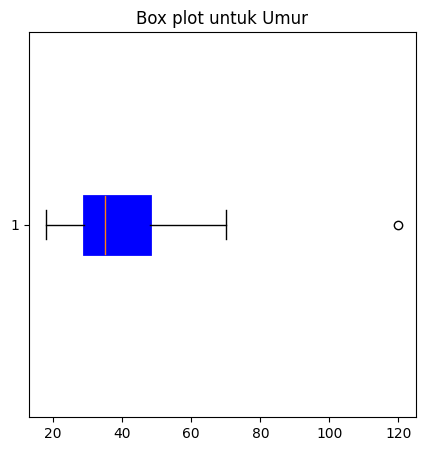

Tabel Pencilan untuk Umur
     ID_pelanggan Jenis Kelamin   Umur  Pendapatan pertahun (juta)  \
249           250     Laki-laki  120.0                          98   

     Skor Belanja (1-100)  
249                  15.0  


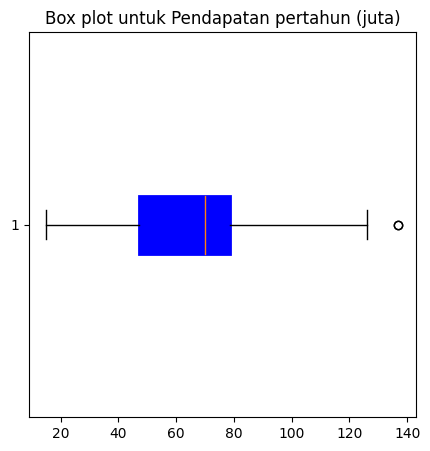

Tabel Pencilan untuk Pendapatan pertahun (juta)
     ID_pelanggan Jenis Kelamin  Umur  Pendapatan pertahun (juta)  \
198           199     Laki-laki  32.0                         137   
199           200     Laki-laki  30.0                         137   

     Skor Belanja (1-100)  
198                  18.0  
199                  83.0  


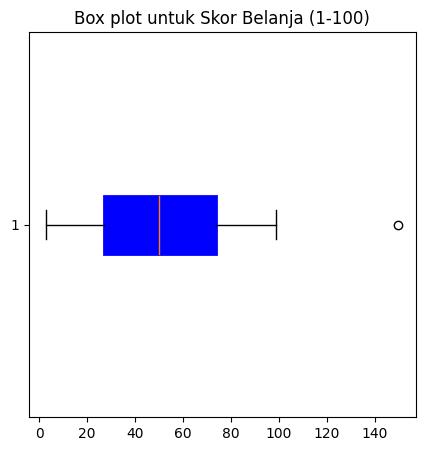

Tabel Pencilan untuk Skor Belanja (1-100)
    ID_pelanggan Jenis Kelamin  Umur  Pendapatan pertahun (juta)  \
16            17     Perempuan  35.0                          21   

    Skor Belanja (1-100)  
16                 150.0  


In [ ]:
# Daftar kolom yang ingin ditampilkan grafik dan tabel pencilannya
kolom = ['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

for k in kolom:
    # Menunjukkan grafik pencilan
    plt.figure(figsize=(5,5))
    boxplot = plt.boxplot(df[k], vert=False, patch_artist=True)

    # Mengubah warna bagian dalam box plot menjadi biru
    for box in boxplot['boxes']:
        box.set(color='#0000FF', linewidth=2)
        box.set(facecolor = '#0000FF')

    plt.title('Box plot untuk ' + k)
    plt.show()

    # Menunjukkan tabel pencilan
    Q1 = df[k].quantile(0.25)
    Q3 = df[k].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[k] >= Q1 - 1.5 * IQR) & (df[k] <= Q3 + 1.5 *IQR)
    print('Tabel Pencilan untuk ' + k)
    print(df.loc[~filter])

Sekarang kita akan membuat fungsi yang akan mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 1 Juli 2021.

In [ ]:
df2 = df.copy() # membuat salinan dari dataframe asli

In [ ]:
# Menghapus baris dengan data missing
df2 = df2.dropna()

**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)


---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Level significant acuan adalah 5% (level aplha)
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [ ]:
#mengubah tipe data Umur menajadi integer
df2['Umur'] = df2['Umur'].astype(int)


In [ ]:
# Mengambil 100 sampel acak dari df2
df_100 = df2.sample(100, random_state=1)

# Nilai rata-rata dan standar deviasi sampel
mean_sample = np.mean(df_100['Umur'])
std_dev_sample = np.std(df_100['Umur'])

# Nilai rata-rata populasi (hipotesis nol)
mean_population = 35

# Ukuran sampel
n = 100

# Menghitung z-score
z_score = (mean_sample - mean_population) / (std_dev_sample / np.sqrt(n))

# Menghitung p-value
p_value = 1 - stats.norm.cdf(z_score)

print('Z-score:', z_score)
print('P-value:', p_value)


Z-score: 2.2314184861345217
P-value: 0.01282671073010877


Selanjutkan kita akan melakukan evaluasi model kita dengan membuat prediksi dari x_test kita lalu bandingkan hasilnya dengan y_test. cari nilai r_square.

Give your analysis:

**Z-score** 2.23 menunjukkan bahwa rata-rata usia sampel berada 2.23 standar deviasi di atas rata-rata populasi.

**P-value** 0.0128, yang lebih kecil dari 0.05, menunjukkan bahwa ada bukti cukup kuat untuk menyimpulkan bahwa rata-rata usia pengunjung supermarket lebih dari 35 tahun, berdasarkan sampel yang kita miliki. Namun, ini tidak berarti semua pengunjung supermarket berusia di atas 35 tahun. Ini hanya berdasarkan sampel yang kita miliki dan mungkin berbeda jika kita memiliki sampel yang berbeda atau lebih banyak data.



---



---



---



## Soal 5. EDA

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

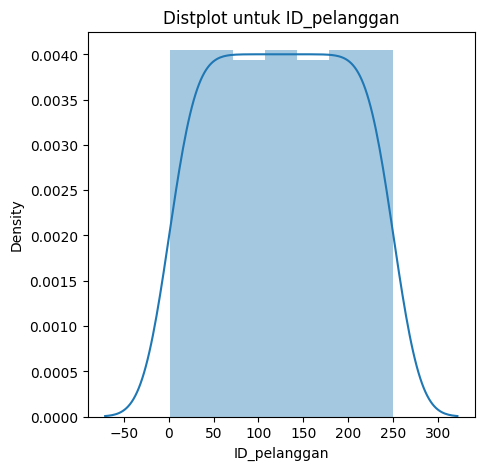

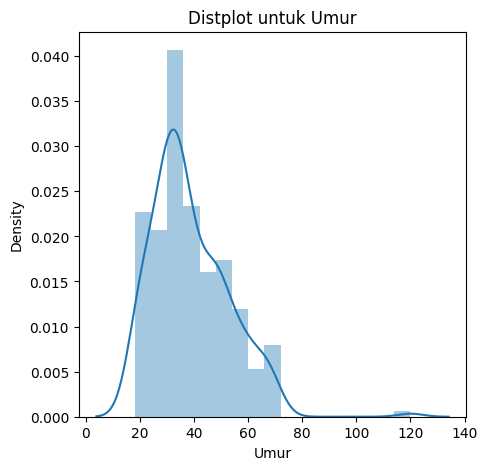

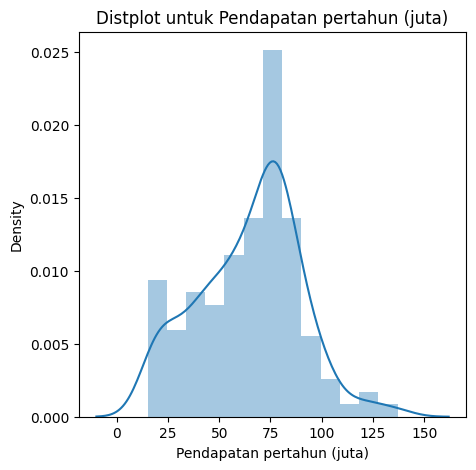

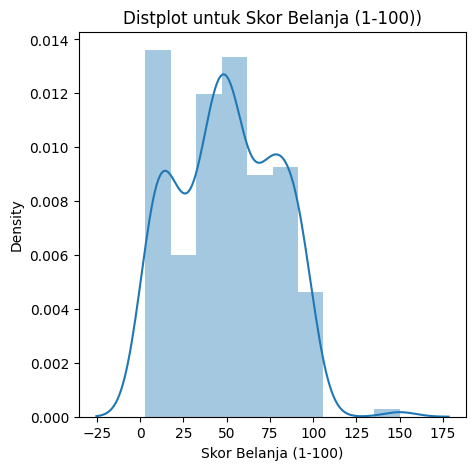

In [ ]:
# Menunjukkan distplot untuk kolom 'ID_pelanggan'
plt.figure(figsize=(5,5))
sns.distplot(df2['ID_pelanggan'])
plt.title('Distplot untuk ID_pelanggan')
plt.show()

# Menunjukkan distplot untuk kolom 'Umur'
plt.figure(figsize=(5,5))
sns.distplot(df2['Umur'])
plt.title('Distplot untuk Umur')
plt.show()

# Menunjukkan distplot untuk kolom 'Pendapatan pertahun (juta)'
plt.figure(figsize=(5,5))
sns.distplot(df2['Pendapatan pertahun (juta)'])
plt.title('Distplot untuk Pendapatan pertahun (juta)')
plt.show()

# Menunjukkan distplot untuk kolom 'Skor Belanja (1-100)'
plt.figure(figsize=(5,5))
sns.distplot(df2['Skor Belanja (1-100)'])
plt.title('Distplot untuk Skor Belanja (1-100))')
plt.show()


Give your analysis:

ID pelanggan: Grafik ini menunjukkan distribusi data untuk variabel “ID pelanggan”. Dari bentuk grafik, tampaknya data ini memiliki distribusi yang cukup simetris dengan sebaran data yang cukup lebar.

Umur: Grafik ini menunjukkan distribusi data untuk variabel “Umur”. Dari bentuk grafik, tampaknya data ini memiliki distribusi yang cenderung miring ke kanan, yang menunjukkan bahwa sebagian besar pengunjung supermarket berusia lebih muda dengan beberapa pengunjung yang lebih tua.

Pendapatan Pertahun (juta): Grafik ini menunjukkan distribusi pendapatan per tahun dalam satuan jutaan. Dari grafik ini, kita dapat melihat bahwa pendapatan yang paling sering muncul adalah sekitar 75 juta per tahun, dengan kepadatan tertinggi sekitar 0.02. Grafik ini juga menunjukkan sedikit kemiringan ke kanan, yang menunjukkan bahwa ada beberapa orang dengan pendapatan yang sangat tinggi yang menarik rata-rata ke atas.

Skor Belanja 1-100: Grafik ini menunjukkan distribusi data untuk variabel “Skor Belanja 1-100”. Dari bentuk grafik, tampaknya data ini memiliki distribusi yang cenderung miring ke kiri, yang menunjukkan bahwa sebagian besar pengunjung supermarket memiliki skor belanja yang tinggi dengan beberapa pengunjung yang memiliki skor belanja yang lebih rendah.

In [ ]:
#5 data teratas pada df2
high_skor_df2 = df2.head()
high_skor_df2


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19,15,39.0
1,2,Laki-laki,21,15,81.0
2,3,Perempuan,20,16,6.0
3,4,Perempuan,23,16,77.0
4,5,Perempuan,31,17,40.0


In [ ]:
#5 data terbawah pada df2
low_skor_df2 = df2.tail()
low_skor_df2


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
245,246,Laki-laki,59,93,14.0
246,247,Laki-laki,35,93,90.0
247,248,Perempuan,37,97,32.0
248,249,Perempuan,32,97,86.0
249,250,Laki-laki,120,98,15.0


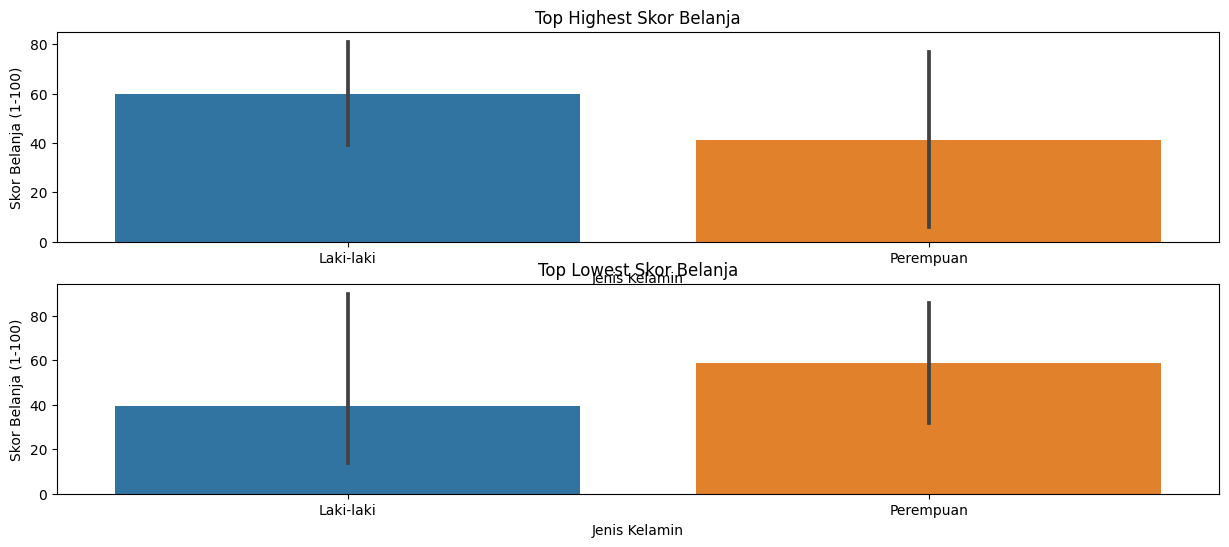

In [ ]:
#code here for bivariate
fig, ax = plt.subplots(2, 1, figsize=(15,6))
sns.barplot(x='Jenis Kelamin', y = 'Skor Belanja (1-100)', data=high_skor_df2, ax=ax[0]).set(title='Top Highest Skor Belanja')

sns.barplot(x='Jenis Kelamin', y = 'Skor Belanja (1-100)', data=low_skor_df2, ax=ax[1]).set(title='Top Lowest Skor Belanja')

plt.show()

Give your analysis:

**TOP Highest Skor Belanja**

Plot batang ini menunjukkan skor belanja untuk kelompok “Laki-laki” dan “Perempuan”. Skor belanja rata-rata untuk “Laki-laki” adalah 60, sedangkan untuk “Perempuan” adalah 70. Jadi, “Perempuan” memiliki skor belanja yang lebih tinggi dibandingkan “Laki-laki”.

**Top Lowest Skor Belanja**

Plot batang ini menunjukkan skor belanja untuk kategori “Laki-laki” dan “Perempuan”. Skor belanja rata-rata untuk “Laki-laki” adalah 40, sedangkan untuk “Perempuan” adalah 60. Jadi, “Perempuan” memiliki skor belanja yang lebih rendah dibandingkan “Laki-laki”.

<Axes: >

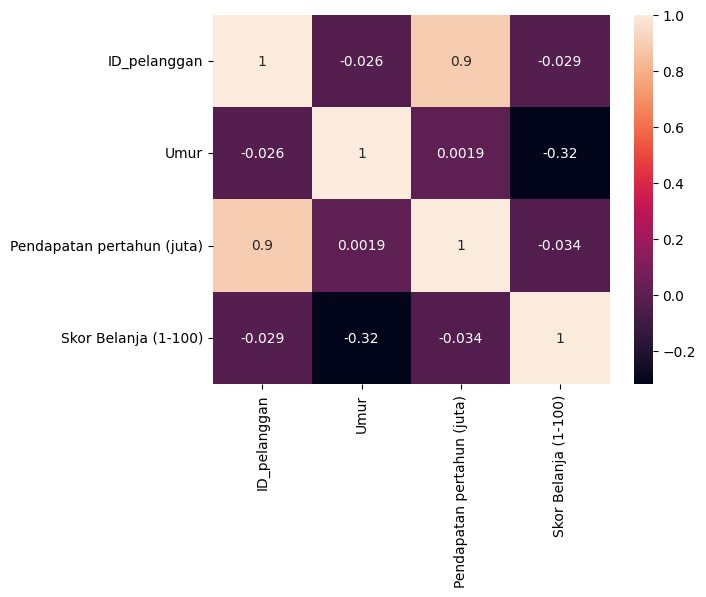

In [ ]:
#code here for multivariate
sns.heatmap(df2[['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']].corr(), annot=True, fmt='.2g')

Give your analysis:



**Analisis Heat Map**

Dari tabel heat map ini dapat dilihat meliki masing - masing 4 sumbu pada sisi nya yang di ambil dari 4 kolom yang ada di df2, pada tabel head map ini terdapat angka yang di mulai dari yang terendah kisaran 0.2 sampai yang tertinggi 1 (semakin tinggi angka maka semakin besar korelasi antar kolom).

Dan yang tertinggi disini ialah kolom itu ke kolom itu sendiri (cth : ID_pelanggan ke ID_pelanggan) diikuti dengan ID_Pelanggan ke pendapatan pertahun dengan skor 0.9

**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/file/d/1aNLD2M9a-d63sVkCqN7n475LQ8NqSsi1/)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





# Soal 6. Data scaling
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [ ]:
#menjukkan kolom Umur dan Skor Belaja (1-100) saja
df2_scale = df2[['Umur', 'Skor Belanja (1-100)']].copy()
df2_scale

,Umur,Skor Belanja (1-100)
0,19,39.0
1,21,81.0
2,20,6.0
3,23,77.0
4,31,40.0
...,...,...
245,59,14.0
246,35,90.0
247,37,32.0
248,32,86.0


In [ ]:
#scaling data
sc = StandardScaler()
scaled_data = sc.fit_transform(df2_scale)

scaled_data

array([[-1.38278232, -0.39593894],
       [-1.24176842,  1.08302189],
       [-1.31227537, -1.5579796 ],
       [-1.10075451,  0.94216848],
       [-0.53669891, -0.36072559],
       [-1.17126147,  0.90695512],
       [-0.25467111, -1.5579796 ],
       [-1.10075451,  1.54079548],
       [ 1.79003046, -1.66361966],
       [-0.60720586,  0.76610171],
       [ 2.00155132, -1.27627277],
       [-0.25467111,  1.71686225],
       [ 1.36698876, -1.24105942],
       [-1.03024756,  0.94216848],
       [-0.1136572 , -1.31148612],
       [-1.17126147,  1.01259518],
       [-0.25467111,  3.51274326],
       [-1.31227537,  0.55482159],
       [ 0.94394706, -0.74807247],
       [-0.25467111,  1.68164889],
       [-0.25467111, -0.53679236],
       [-0.95974061,  0.80131506],
       [ 0.52090535, -1.59319295],
       [-0.53669891,  0.80131506],
       [ 1.08496096, -1.27627277],
       [-0.67771281,  1.11823524],
       [ 0.4503984 , -0.64243241],
       [-0.25467111,  0.37875483],
       [ 0.09786365,

In [ ]:
#head dan tail dari pada data yang sudah di scaled
df2_scaled = pd.DataFrame(scaled_data, columns=['Umur', 'Skor Belanja (1-100)'])
df2_scaled

,Umur,Skor Belanja (1-100)
0,-1.382782,-0.395939
1,-1.241768,1.083022
2,-1.312275,-1.557980
3,-1.100755,0.942168
4,-0.536699,-0.360726
...,...,...
245,1.437496,-1.276273
246,-0.254671,1.399942
247,-0.113657,-0.642432
248,-0.466192,1.259089




---



---



---



# Soal 7. Clustering menggunakan k-menas

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [ ]:
#clustering n=2
from sklearn.cluster import KMeans
k2 = KMeans(n_clusters=2, random_state=9)

k2.fit(df2_scaled)
df2_scaled['lbl_k2'] = k2.labels_

df2_scaled
df2_scaled['lbl_k2'].value_counts()

0    127
1    123
Name: lbl_k2, dtype: int64

In [ ]:
centroid_k2 =k2.cluster_centers_
centroidX_k2 = centroid_k2[:,0]
centroidY_k2 = centroid_k2[:,1]

print(centroidX_k2, centroidY_k2)

[ 0.64415372 -0.66510181] [-0.7544497   0.77898465]


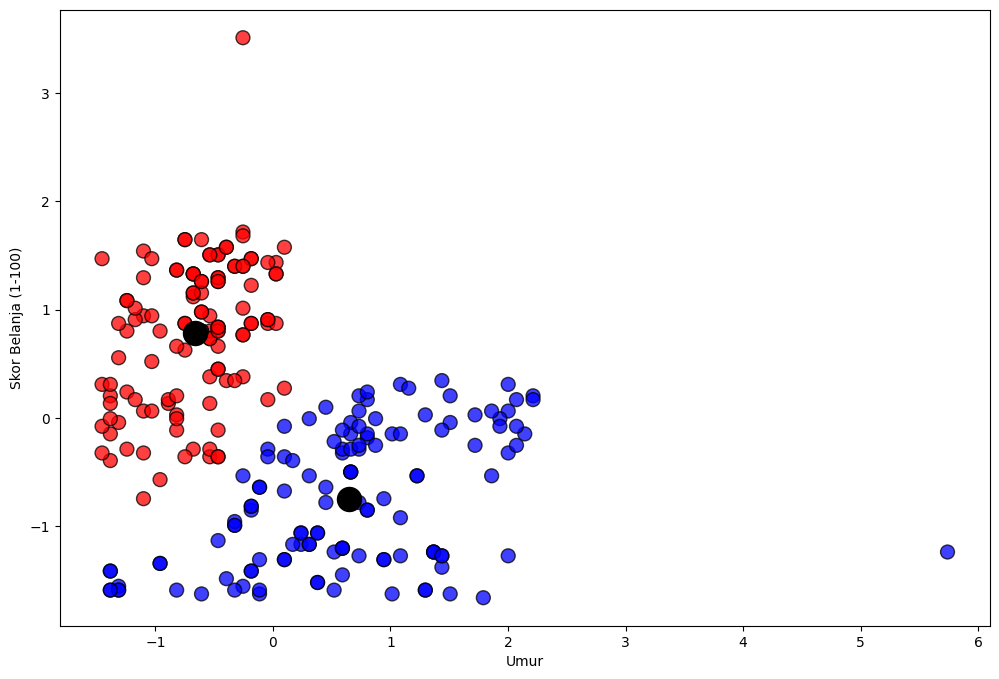

In [ ]:
#membuat figure dan subplota
fig, ax = plt.subplots(figsize=(12,8))

colorDict = {0 :'blue', 1: 'red'}

# Plot data
ax.scatter(df2_scaled['Umur'], df2_scaled["Skor Belanja (1-100)"],
           s=100,
          c= df2_scaled['lbl_k2'].map(colorDict), alpha = 0.75, zorder=2,
          edgecolors= "black")

# Plot centroid
ax.scatter(centroidX_k2, centroidY_k2,
           s=300,
          c='black', marker='o', zorder=3)

# Label diagram
ax.set_xlabel('Umur')
ax.set_ylabel('Skor Belanja (1-100)')

plt.show()

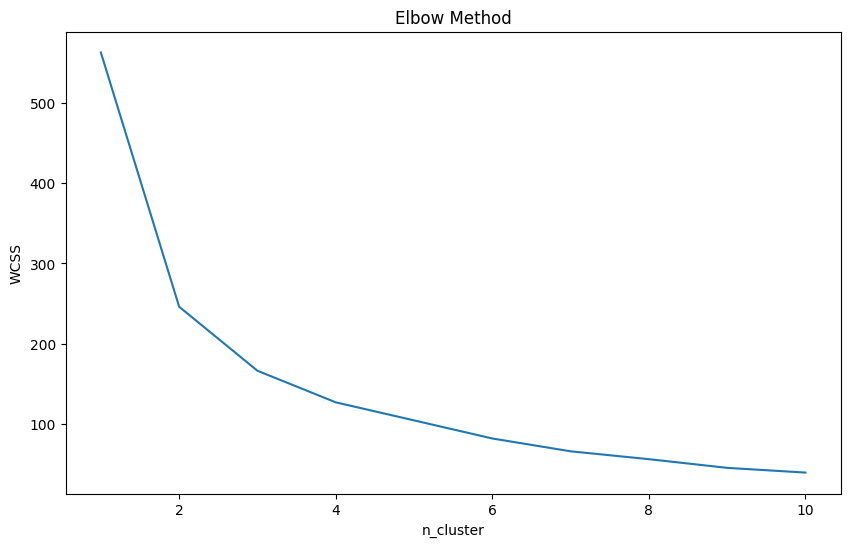

range(1, 11)


In [ ]:
#elbow method beserta visualisasinya
def elbowMethod (X, k_min=1, k_max=10, save=False):
    k_range = range(k_min, k_max+1)

    result = []
    for k in k_range:
        model = KMeans(n_clusters=k, random_state=20)
        model.fit(X)
        result.append(model.inertia_)

    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(k_range, result)

    plt.title('Elbow Method')
    plt.xlabel('n_cluster')
    plt.ylabel('WCSS')

    plt.show()
    print(k_range)

elbowMethod(df2_scaled)

In [ ]:
#clustering n=3
k3 = KMeans(n_clusters=3, random_state=9)

k3.fit(df2_scaled)
df2_scaled['lbl_k3'] = k3.labels_

df2_scaled

,Umur,Skor Belanja (1-100),lbl_k2,lbl_k3
0,-1.382782,-0.395939,1,1
1,-1.241768,1.083022,1,1
2,-1.312275,-1.557980,0,0
3,-1.100755,0.942168,1,1
4,-0.536699,-0.360726,1,1
...,...,...,...,...
245,1.437496,-1.276273,0,2
246,-0.254671,1.399942,1,1
247,-0.113657,-0.642432,0,0
248,-0.466192,1.259089,1,1


In [ ]:
#centroid k=3
centroid_k3 =k3.cluster_centers_
centroidX_k3 = centroid_k3[:,0]
centroidY_k3 = centroid_k3[:,1]

print(centroidX_k3, centroidY_k3)

[-0.17101879 -0.65906634  1.28338766] [-1.12407947  0.80277016 -0.44020716]


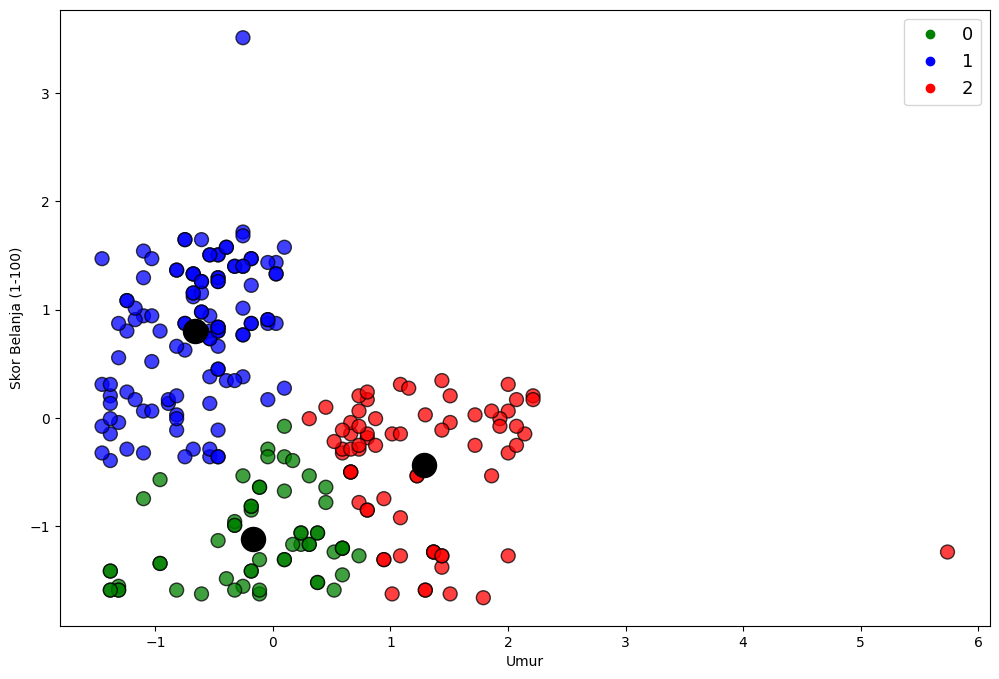

In [ ]:
#visualisasi n=3 beserta centroid-centroidnya
# from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(figsize=(12,8))

colorDict = {0 :'green', 1 :'blue', 2: 'red'}

# Plot data
ax.scatter(df2_scaled['Umur'], df2_scaled["Skor Belanja (1-100)"],
           s=100,
          c= df2_scaled['lbl_k3'].map(colorDict), alpha = 0.75, zorder=2,
          edgecolors= "black")

# Plot centroid
ax.scatter(centroidX_k3, centroidY_k3,
           s=300,
          c='black', marker='o', zorder=3)

# Label diagram
ax.set_xlabel('Umur')
ax.set_ylabel('Skor Belanja (1-100)')

# Set Legend
markers = [ plt.Line2D( [0,0],[0,0], color = color, marker='o', linestyle='' ) for color in colorDict.values() ]
plt.legend(markers, list(colorDict.keys())[:4], prop={'size': 13})

plt.show()

**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [ ]:
# Define the data for clustering
X = df2_scaled.drop(['lbl_k2', 'lbl_k3'], axis=1)

# Create an instance of KMeans with 2 clusters
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)
labels2 = kmeans2.labels_

# Create an instance of KMeans with 3 clusters
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
labels3 = kmeans3.labels_

# Add labels to the dataframe
df2_scaled['cluster2'] = labels2
df2_scaled['cluster3'] = labels3


In [ ]:
from sklearn.metrics import silhouette_score

# Define the data for clustering
X = df2_scaled.drop(['lbl_k2', 'lbl_k3', 'cluster2', 'cluster3'], axis=1)

# Calculate silhouette score for k=2
score2 = silhouette_score(X, labels2)
print('Silhouette Score for 2 clusters: ', score2)

# Calculate silhouette score for k=3
score3 = silhouette_score(X, labels3)
print('Silhouette Score for 3 clusters: ', score3)


Silhouette Score for 2 clusters:  0.48012931775352735
Silhouette Score for 3 clusters:  0.4618801060425121




---



---



---



# Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket

Skor siluet untuk 2 cluster adalah 0.5046 dan untuk 3 cluster adalah 0.4745. Skor yang lebih tinggi menunjukkan bahwa sampel cocok dengan klusternya sendiri dan buruk dengan kluster tetangga. Skor siluet untuk 2 cluster sedikit lebih tinggi daripada untuk 3 cluster, yang dapat menunjukkan bahwa model dengan 2 cluster sedikit lebih baik dalam memisahkan sampel antar cluster dibandingkan dengan model dengan 3 cluster.

**Kesimpulan :** model dengan 2 cluster memiliki performa sedikit lebih baik dalam memisahkan sampel antar cluster dibandingkan dengan model dengan 3 cluster. Namun, pemilihan jumlah cluster juga harus mempertimbangkan pengetahuan domain dan tujuan analisis. Skor siluet hanya salah satu dari banyak metrik yang dapat digunakan untuk mengevaluasi kualitas model clustering.